Clustering is sometimes called unsupervised classification because it produces the same result as classification but without having predefined classes.

k-means clustering
- Pros: Easy to implement 
- Cons: Can converge at local minima; slow on very large datasets 
- Works with: Numeric values

In [1]:
%matplotlib inline

In [2]:
import numpy as np
def loadDataSet(fileName):
    dataMat = []
    fr = open(fileName)
    for line in fr.readlines():
        curLine = line.strip().split('\t')
        fltLine = list(map(float, curLine))
        dataMat.append(fltLine)
    return dataMat

def distEclud(vecA, vecB):
    return np.sqrt(np.sum(np.power((vecA-vecB),2)))
                   
def randCent(dataSet, k):
    n = np.shape(dataSet)[1]
    centroids = np.mat(np.zeros((k,n)))
    for j in range(n):
        minJ = min(dataSet[:,j])
        rangeJ = float(max(dataSet[:,j]) - minJ)
        centroids[:,j] = minJ + rangeJ * np.random.rand(k,1)
    return centroids

In [3]:
datMat = np.mat(loadDataSet('./src/testSet.txt'))
print(min(datMat[:,0]))
print(max(datMat[:,0]))
print(min(datMat[:,1]))
print(max(datMat[:,1]))

[[-5.379713]]
[[4.838138]]
[[-4.232586]]
[[5.1904]]


In [4]:
print(randCent(datMat, 2))

[[-3.45420891  0.95227312]
 [ 0.79381089 -1.98272677]]


In [5]:
print(distEclud(datMat[0], datMat[1]))

5.184632816681332


In [6]:
def kMeans(dataSet, k, distMeas=distEclud, createCent=randCent):
    m = np.shape(dataSet)[0]
    clusterAssment = np.mat(np.zeros((m,2)))
    centroids = createCent(dataSet,k)
    clusterChanged = True
    while clusterChanged:
        clusterChanged = False
        for i in range(m):
            minDist = np.inf
            minIndex = -1
            for j in range(k):
                distJI = distMeas(centroids[j,:],dataSet[i,:])
                if distJI < minDist:
                    minDist = distJI
                    minIndex = j
            if clusterAssment[i,0] != minIndex:
                clusterChanged = True
            clusterAssment[i,:]=minIndex, minDist**2
        print(centroids)
        for cent in range(k):
            ptsInClust = dataSet[np.nonzero(clusterAssment[:,0].A==cent)[0]]
            centroids[cent,:] = np.mean(ptsInClust, axis=0)
    return centroids, clusterAssment

In [7]:
datMat=np.mat(loadDataSet('./src/testSet.txt'))
myCentroids, clustAssing = kMeans(datMat,4)

[[ 3.2558643   0.34790669]
 [-4.74928911  0.22267911]
 [-2.82185379 -3.95437648]
 [-4.80011086 -2.27132681]]
[[ 2.72843426  0.46698044]
 [-2.54951105  2.75812458]
 [-2.24894777 -3.30205315]
 [-4.11344022 -2.59397967]]
[[ 2.82102866  0.39129192]
 [-2.46154315  2.78737555]
 [-1.7671259  -3.2956472 ]
 [-4.04883533 -2.77633633]]
[[ 2.84688416  0.48771357]
 [-2.46154315  2.78737555]
 [-1.09360656 -3.37895811]
 [-3.89646064 -2.78844243]]
[[ 2.85838303  0.97287476]
 [-2.46154315  2.78737555]
 [ 0.916941   -3.6255422 ]
 [-3.67966141 -2.77958   ]]
[[ 2.78853804  2.41481513]
 [-2.46154315  2.78737555]
 [ 2.42776071 -3.19858565]
 [-3.53973889 -2.89384326]]
[[ 2.6265299   3.10868015]
 [-2.46154315  2.78737555]
 [ 2.65077367 -2.79019029]
 [-3.53973889 -2.89384326]]


[[-1.15298302  3.5828476 ]
 [ 4.51299778  3.40480754]
 [ 1.27687654 -1.55170665]
 [ 0.44020301  1.00805826]]
[[-2.24464335  2.9623764 ]
 [ 2.84705993  3.364038  ]
 [-0.2897198  -2.83942545]
 [ 1.3889605   1.929509  ]]
[[-2.46154315  2.78737555]
 [ 2.72275519  3.38230919]
 [-0.72175297 -3.03774939]
 [ 2.92010375  0.479827  ]]
[[-2.46154315  2.78737555]
 [ 2.51964406  3.40459212]
 [-1.34318171 -3.12879161]
 [ 3.3122075  -1.02407842]]
[[-2.46154315  2.78737555]
 [ 2.54391447  3.21299611]
 [-3.01169468 -3.01238673]
 [ 3.09814284 -2.43041226]]
[[-2.46154315  2.78737555]
 [ 2.6265299   3.10868015]
 [-3.38237045 -2.9473363 ]
 [ 2.80293085 -2.7315146 ]]
[[-2.46154315  2.78737555]
 [ 2.6265299   3.10868015]
 [-3.38237045 -2.9473363 ]
 [ 2.80293085 -2.7315146 ]]
[ 2.78737555  3.10868015 -2.9473363  -2.7315146 ]


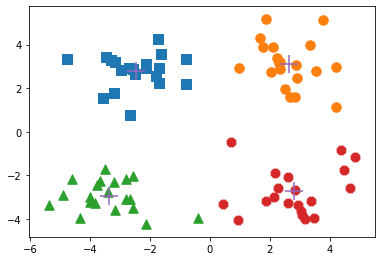

In [8]:
import matplotlib.pyplot as plt

def showPlt(datMat, alg=kMeans, numClust=4):
    myCentroids, clustAssing = alg(datMat, numClust)
    fig = plt.figure()
    rect=[0.1,0.1,0.8,0.8]
    scatterMarkers=['s', 'o', '^', '8', 'p', \
                    'd', 'v', 'h', '>', '<']
    axprops = dict(xticks=[], yticks=[])
    ax0=fig.add_axes(rect, label='ax0', **axprops)
    ax1=fig.add_axes(rect, label='ax1', frameon=False)
    for i in range(numClust):
        ptsInCurrCluster = datMat[np.nonzero(clustAssing[:,0].A==i)[0],:]
        markerStyle = scatterMarkers[i % len(scatterMarkers)]
        ax1.scatter(ptsInCurrCluster[:,0].flatten().A[0], ptsInCurrCluster[:,1].flatten().A[0], marker=markerStyle, s=90)
    print(myCentroids)
    print(myCentroids[:,1].flatten().A[0])
    ax1.scatter(myCentroids[:,0].flatten().A[0], myCentroids[:,1].flatten().A[0], marker='+', s=300)
    plt.show()
    
showPlt(datMat)

## Bisecting k-means

```
Start with all the points in one cluster
While the number of clusters is less than k
    for every cluster
        measure total error
        perform k-means clustering with k=2 on the given cluster
        measure total error after k-means has split the cluster in two
    choose the cluster split that gives the lowest error and commit this split
```


In [9]:
def biKmeans(dataSet, k, distMeas=distEclud):
    m = np.shape(dataSet)[0]
    clusterAssment = np.mat(np.zeros((m,2)))
    centroid0 = np.mean(dataSet, axis=0).tolist()[0]
    centList =[centroid0]
    for j in range(m):
        clusterAssment[j,1] = distMeas(np.mat(centroid0), dataSet[j,:])**2
    while (len(centList) < k):
        lowestSSE = np.inf
        for i in range(len(centList)):
            ptsInCurrCluster = dataSet[np.nonzero(clusterAssment[:,0].A==i)[0],:] 
            centroidMat, splitClustAss = kMeans(ptsInCurrCluster, 2 , distMeas)         
            sseSplit = np.sum(splitClustAss[:,1])
            sseNotSplit = np.sum(clusterAssment[np.nonzero(clusterAssment[:,0].A!=i)[0],1])
            print("sseSplit, and notSplit: ",sseSplit,sseNotSplit)
            if (sseSplit + sseNotSplit) < lowestSSE:
                bestCentToSplit = i
                bestNewCents = centroidMat
                bestClustAss = splitClustAss.copy()
                lowestSSE = sseSplit + sseNotSplit
        bestClustAss[np.nonzero(bestClustAss[:,0].A == 1)[0],0] = len(centList)                        
        bestClustAss[np.nonzero(bestClustAss[:,0].A == 0)[0],0] = bestCentToSplit                    
        print('the bestCentToSplit is: ',bestCentToSplit)
        print('the len of bestClustAss is: ', len(bestClustAss))
        centList[bestCentToSplit] = bestNewCents[0,:].tolist()[0]   
        centList.append(bestNewCents[1,:].tolist()[0])
        clusterAssment[np.nonzero(clusterAssment[:,0].A == bestCentToSplit)[0],:]= bestClustAss
    return np.mat(centList), clusterAssment

In [10]:
datMat3=np.mat(loadDataSet('./src/testSet2.txt'))
centList,myNewAssments=biKmeans(datMat3,3)

[[-0.84798374  1.88990262]
 [-3.27671831  0.1006536 ]]
[[ 0.67048623  3.13482194]
 [-1.31721532 -1.44795844]]
[[ 0.18204313  3.32057745]
 [-0.74459109 -2.39373345]]
[[-0.00675605  3.22710297]
 [-0.45965615 -2.7782156 ]]
sseSplit, and notSplit:  453.0334895807502 0.0
the bestCentToSplit is:  0
the len of bestClustAss is:  60
[[-1.02656849  4.5542348 ]
 [ 0.40908989  3.07481502]]
[[-3.06779095  3.33769884]
 [ 2.76275171  3.12704005]]
[[-2.94737575  3.3263781 ]
 [ 2.93386365  3.12782785]]
sseSplit, and notSplit:  77.59224931775066 29.15724944412535
[[-0.13931527 -2.05064338]
 [ 0.41554294 -2.30290845]]
[[-1.12616164 -2.30193564]
 [ 0.35496167 -3.36033556]]
sseSplit, and notSplit:  12.753263136887313 423.8762401366249
the bestCentToSplit is:  0
the len of bestClustAss is:  40


In [11]:
print(centList)

[[-2.94737575  3.3263781 ]
 [-0.45965615 -2.7782156 ]
 [ 2.93386365  3.12782785]]


[[-4.05969044 -2.00840037]
 [-0.4934283   0.2767297 ]]
[[-1.824591   -2.24681067]
 [ 0.02748483  1.61112354]]
[[-0.45965615 -2.7782156 ]
 [-0.00675605  3.22710297]]
sseSplit, and notSplit:  453.0334895807502 0.0
the bestCentToSplit is:  0
the len of bestClustAss is:  60
[[-0.71237692 -3.27306014]
 [-0.89509304 -2.47438751]]
[[ 0.171785   -3.46536256]
 [-0.97628982 -2.21600445]]
[[ 0.35496167 -3.36033556]
 [-1.12616164 -2.30193564]]
sseSplit, and notSplit:  12.753263136887313 423.8762401366249
[[-0.35093556  4.68046893]
 [-2.17321664  2.09330321]]
[[ 2.35417086  3.33737264]
 [-2.89233339  3.09232894]]
[[ 2.93386365  3.12782785]
 [-2.94737575  3.3263781 ]]
sseSplit, and notSplit:  77.59224931775066 29.15724944412535
the bestCentToSplit is:  1
the len of bestClustAss is:  40
[[-0.45965615 -2.7782156 ]
 [ 2.93386365  3.12782785]
 [-2.94737575  3.3263781 ]]
[-2.7782156   3.12782785  3.3263781 ]


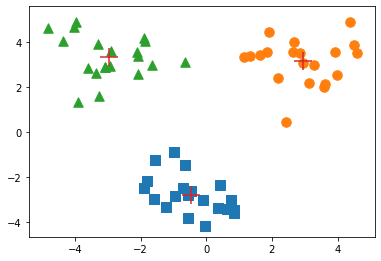

In [12]:
showPlt(datMat3, alg=biKmeans,numClust=3)